In [178]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# numpy is pyplot as plt
import seaborn as sns
# numpy is seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model  import  LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
     

Data Preparation

Import training data

In [110]:
# import train data
train_df=pd.read_csv("/content/train.csv")
# import test data
test_df=pd.read_csv("/content/test.csv")

In [111]:
# displaying the top 5 row of train data
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [112]:
# displaying the top 5 row of test data
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [113]:
train_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [114]:
# # displaying some sample of train data
train_df.sample(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1969,640,0,1.3,1,5,1,6,0.6,143,8,...,976,1353,2711,15,7,8,1,1,0,2
150,843,1,0.5,0,1,1,56,0.1,147,5,...,140,800,2341,10,1,20,1,1,1,1
1727,1564,0,1.4,0,5,1,26,0.1,129,6,...,117,1115,3742,13,3,13,1,1,0,3
1251,1317,0,1.8,1,2,0,43,0.5,113,5,...,179,613,3436,16,13,5,0,1,1,3
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,650,864,3984,17,14,8,1,1,1,3
1550,1280,1,1.3,0,0,1,39,1.0,108,7,...,356,588,2335,6,4,2,1,0,1,1
402,1479,0,0.5,0,8,0,19,0.6,156,3,...,180,1476,3323,13,12,6,1,0,1,3
1895,1349,1,2.1,1,3,0,46,0.9,134,6,...,212,623,2367,11,7,10,1,0,1,1
57,987,0,1.3,1,0,1,61,0.4,107,3,...,581,820,3963,9,4,20,1,0,1,3
1277,1528,0,2.4,0,2,0,37,0.2,156,8,...,306,564,733,15,0,14,1,1,0,0


In [115]:
# # displaying some sample of test data
test_df.sample(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
417,418,666,0,1.1,0,1,1,28,0.9,179,...,13,157,1466,3850,7,5,9,1,1,1
251,252,1183,1,1.4,0,1,0,32,0.8,197,...,4,884,1475,637,12,6,16,0,0,1
512,513,1176,1,2.3,0,0,0,56,0.7,103,...,1,93,518,2974,6,5,11,1,0,1
684,685,553,1,0.5,1,2,1,8,0.5,153,...,3,525,1601,1042,15,11,15,1,0,1
838,839,1191,1,1.7,0,1,0,7,0.4,102,...,2,1354,1418,2734,18,5,15,1,1,0
888,889,859,0,1.1,1,11,1,19,0.5,139,...,16,952,1713,2473,10,4,17,1,1,1
663,664,529,1,2.3,0,3,1,58,1.0,197,...,18,658,1294,873,11,5,4,1,1,0
828,829,1004,0,1.9,0,12,0,24,0.8,128,...,17,793,1537,650,6,0,17,0,1,0
452,453,583,1,1.1,1,15,0,24,0.4,168,...,19,301,1111,3260,14,6,14,1,1,0
970,971,1247,1,2.1,0,10,1,63,0.1,116,...,12,170,1028,2999,9,3,20,1,1,0


In [116]:
# fetching the shape pf train dataset
print(train_df.shape)
# fetching the shape pf test dataset  
print(test_df.shape)

(2000, 21)
(1000, 21)


In [117]:
# displaying the columns of train dataset
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [118]:
# displaying the columns of test dataset
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Data Preprocessing

In [119]:
# checking the types of train dataset
print(train_df.dtypes)
# checking the types of test dataset
print(test_df.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g    

In [120]:
# checking the null values in the train dataset
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [121]:
# checking the null values in the test dataset
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [122]:
# checking the duplicated values in the datset
train_df.duplicated().sum()
test_df.duplicated().sum()

0

In [123]:
# Getting information of dataset
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [124]:
# getting the statistical data of train dataset
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [125]:
# getting the statistical data of test dataset
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [126]:
# displaying the unique values of price range
train_df["price_range"].unique()

array([1, 2, 3, 0])

In [127]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

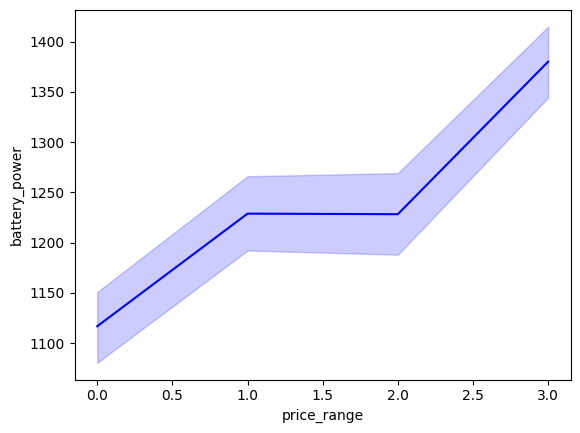

In [177]:
# Relationship between price range and battery power
sns.lineplot(data = train_df ,x = 'price_range',y = 'battery_power' , color='blue')
plt.show()

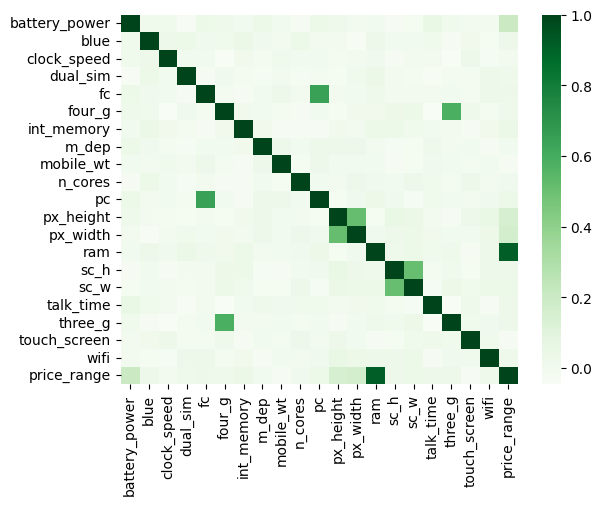

In [171]:
# Find correlation and plotting Heatmap
corr = train_df.corr()
sns.heatmap(corr, cmap="Greens")
plt.show()

Cheching the outliers

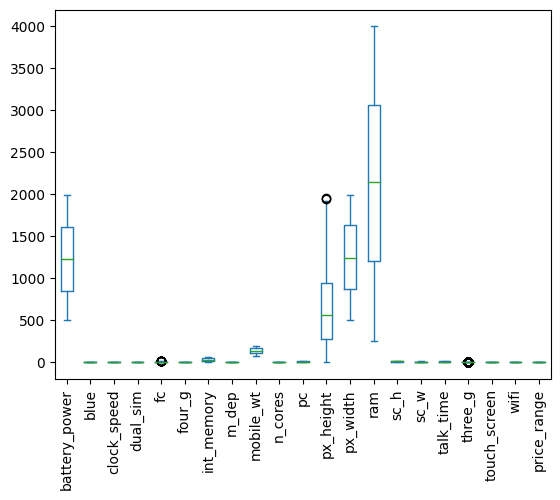

In [128]:
# plot a box plot for checking the outliers
train_df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Hence there are no major outliers found which means data is properly cleaned . So, we can use it for training.

In [129]:
X = train_df.drop('price_range',axis=1)
Y = train_df['price_range']

In [130]:
testing_df = test_df.drop('id',axis=1)

## Standardization and normalization

In [138]:
std = StandardScaler()
x_std = std.fit_transform(x)

In [139]:
test_std = std_scaler.transform(testing_df)

In [140]:
print(test_std)

[[-0.44505984  1.0100505   0.34046327 ... -1.78686097  0.99401789
  -1.01409939]
 [-0.90487356  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
  -1.01409939]
 [ 1.29403758  1.0100505   1.56625363 ... -1.78686097  0.99401789
   0.98609664]
 ...
 [-0.12182446 -0.9900495  -0.14985287 ...  0.55964063 -1.00601811
  -1.01409939]
 [ 0.67032987  1.0100505  -1.2530642  ... -1.78686097  0.99401789
  -1.01409939]
 [ 0.07166151  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
   0.98609664]]


In [141]:
norm = MinMaxScaler()
x_norm = norm.fit_transform(X)
test_norm = norm.transform(testing_df)

In [142]:
print(x_norm)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [143]:
print(test_norm)

[[3.06570551e+02 9.94974999e-01 9.96276131e-01 ... 7.61500000e-01
  1.00299100e+00 5.07000000e-01]
 [2.47291804e+02 9.94974999e-01 5.72060036e-01 ... 1.18766634e+00
  5.03000000e-01 5.07000000e-01]
 [5.30773337e+02 9.94974999e-01 1.32259620e+00 ... 7.61500000e-01
  1.00299100e+00 1.00695100e+00]
 ...
 [3.48241749e+02 4.95000000e-01 8.65748102e-01 ... 1.18766634e+00
  5.03000000e-01 5.07000000e-01]
 [4.50365531e+02 9.94974999e-01 5.72060036e-01 ... 7.61500000e-01
  1.00299100e+00 5.07000000e-01]
 [3.73185777e+02 9.94974999e-01 5.72060036e-01 ... 1.18766634e+00
  5.03000000e-01 1.00695100e+00]]


## Train test split

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


Creatin a object using LogisticRegression

In [146]:
model = LogisticRegression()

In [147]:
model.fit(x_std,Y)

LogisticRegression()

Now, take prediction on our training data

In [149]:
predict = model.predict(test_std)


Data feeding to object that we have created

In [151]:
model.fit(X_train,Y_train)

LogisticRegression()

In [153]:
prediction_training_data = model.predict(X_test)

In [154]:
print(prediction_training_data)


[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


Evaluation

In [155]:
print(confusion_matrix(prediction_training_data, Y_test))

[[102   0   0   0]
 [  3  91   2   0]
 [  0   0  87   1]
 [  0   0   3 111]]


In [156]:
print(accuracy_score(prediction_training_data,Y_test))

0.9775


In [157]:
print(classification_report(prediction_training_data,Y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.95      0.97        96
           2       0.95      0.99      0.97        88
           3       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Hence this model is giving 97% Accuracy.

# There is a final prediction of mobile price classification

In [160]:
prediction_test_data = model.predict(testing_df)

In [161]:
print(prediction_test_data)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 